# I. Introduction

##### RMT-032-Group2

Roles of Group 2 :
- Ignatius Kurniawan Eko Wibowo: Data Scientist
- Iqbal Saputra : Data Analyst
- Bagus Adji Kusuma : Data Engineer

**Proyek kami menggunakan teknik regresi untuk memperkirakan harga rumah 
di ibu kota baru Indonesia (IKN) dan daerah sekitarnya. Dengan mengumpulkan dan 
menganalisis data real estate atau bertipe rumah dari Brighton.co.id, model kami memberikan wawasan 
berbasis data yang tepat untuk membantu investor properti, pembuat kebijakan, 
dan perencana kota dalam mengambil keputusan yang baik. Pendekatan inovatif 
ini menjamin prediksi nilai properti yang akurat, mendukung pertumbuhan dan 
pembangunan yang berkelanjutan di kawasan yang sedang berkembang ini.**

# II. Import Libraries

In [1]:
# Import yang diperlukan
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# III. Data Loading

In [2]:
df1 = pd.read_csv('samarinda_2.csv')
df2 = pd.read_csv('balikpapan_1.csv')
df1.head(10)

,harga,lokasi,luas_bangunan,luas_tanah,sertifikat,furnish,kamar_tidur,kamar_mandi,garasi,listrik
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"Rp 2,8 Miliar","Kalimantan Timur, Samarinda, Sungai Pinang",218 m2,180 m2,SHM,Semi-furnished,3+1,3+1,NaN,4400 Watt
2,Rp 900 Juta,"Kalimantan Timur, Samarinda, Sungai Pinang",250 m2,300 m2,SHM,-,4,2,NaN,1300 Watt
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Rp 11 Miliar,"Kalimantan Timur, Samarinda, Samarinda Kota",350 m2,558 m2,SHM,-,10,6,NaN,3500 Watt
5,"Rp 1,85 Miliar","Kalimantan Timur, Samarinda, Samarinda Seberang",90 m2,200 m2,SHM,Fully-furnished,3,2,NaN,1300 Watt
6,Rp 900 Juta,"Kalimantan Timur, Samarinda, Samarinda Kota",90 m2,200 m2,SHM,Fully-furnished,4,2,NaN,1300 Watt
7,"Rp 1,6 Miliar","Kalimantan Timur, Samarinda, Samarinda Ulu",220 m2,135 m2,SHM,-,4,3,NaN,1300 Watt
8,"Rp 2,2 Miliar","Kalimantan Timur, Samarinda, Samarinda Kota",140 m2,184 m2,SHM,Non-furnished,5+1,2+1,NaN,2200 Watt
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [188]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 468 entries, 0 to 467
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   harga          444 non-null    object 
 1   lokasi         444 non-null    object 
 2   luas_bangunan  444 non-null    object 
 3   luas_tanah     444 non-null    object 
 4   sertifikat     444 non-null    object 
 5   furnish        444 non-null    object 
 6   kamar_tidur    444 non-null    object 
 7   kamar_mandi    444 non-null    object 
 8   garasi         0 non-null      float64
 9   listrik        444 non-null    object 
dtypes: float64(1), object(9)
memory usage: 36.7+ KB


In [189]:
missing_values = df1.isnull().sum()
print("\nJumlah nilai yang hilang di setiap kolom:")
print(missing_values)


Jumlah nilai yang hilang di setiap kolom:
harga             24
lokasi            24
luas_bangunan     24
luas_tanah        24
sertifikat        24
furnish           24
kamar_tidur       24
kamar_mandi       24
garasi           468
listrik           24
dtype: int64


- Insight :

Tidak ditemukan data yang hilang dan akan di lanjutkan ke proses yang selanjutnya

In [190]:
# Mengecek jumlah baris yang duplikat
duplicates = df1.duplicated().sum()
print(f"Jumlah baris yang duplikat: {duplicates}")

Jumlah baris yang duplikat: 30


In [191]:
duplicate_rows = df1[df1.duplicated()]
print("Duplikasi ditemukan:")
duplicate_rows

Duplikasi ditemukan:


,harga,lokasi,luas_bangunan,luas_tanah,sertifikat,furnish,kamar_tidur,kamar_mandi,garasi,listrik
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
58,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
78,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- Insight:

Dari hasil duplikat yang ditampilkan 13 yang duplicated ini menjadi pertimbangan apakah data yang duplikat akan di drop atau tidak, karena mungkin ada kolerasi dari setiap kolom yang akan di lakukan pemodelan nantinya.

### A. Clean Data

#### A.1 Samarinda

In [192]:
# # Mengganti koma dengan titik di kolom Price
# df1['Price'] = df1['Price'].str.replace(',', '.')

# # Mengganti tanda baca dan simbol di kolom Price agar bisa diubah menjadi numerik
# df1['Price'] = df1['Price'].replace({'Rp ': '', ' Miliar': '000000000', ' Juta': ''}, regex=True)
# df1['Price'] = df1['Price'].str.replace('.', '', regex=False).astype(float)

# Menghapus duplikasi
#df1 = df1.drop_duplicates()

In [193]:
df1_clean= df1.drop(columns=['garasi'])
df1_clean

,harga,lokasi,luas_bangunan,luas_tanah,sertifikat,furnish,kamar_tidur,kamar_mandi,listrik
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"Rp 2,8 Miliar","Kalimantan Timur, Samarinda, Sungai Pinang",218 m2,180 m2,SHM,Semi-furnished,3+1,3+1,4400 Watt
2,Rp 900 Juta,"Kalimantan Timur, Samarinda, Sungai Pinang",250 m2,300 m2,SHM,-,4,2,1300 Watt
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Rp 11 Miliar,"Kalimantan Timur, Samarinda, Samarinda Kota",350 m2,558 m2,SHM,-,10,6,3500 Watt
...,...,...,...,...,...,...,...,...,...
463,"Rp 1,8 Miliar","Kalimantan Timur, Samarinda, Sungai Pinang",84 m2,105 m2,HGB,Non-furnished,3,2,2200 Watt
464,"Rp 1,25 Miliar","Kalimantan Timur, Samarinda, Samarinda Ilir",200 m2,251 m2,SHM,-,13,5,2200 Watt
465,"Rp 1,6 Miliar","Kalimantan Timur, Samarinda, Samarinda Ulu",200 m2,300 m2,SHM,-,5,4,2200 Watt
466,Rp 3 Miliar,"Kalimantan Timur, Samarinda, Samarinda Ulu",155 m2,330 m2,SHM,-,4,4,3500 Watt


In [194]:
# Menghapus "Kalimantan Timur," dari kolom Lokasi
df1_clean['lokasi'] = df1_clean['lokasi'].str.replace('Kalimantan Timur,', '', regex=False)
df1_clean['lokasi'] = df1_clean['lokasi'].str.replace('Samarinda,', '', regex=False)
df1_clean['harga'] = df1_clean['harga'].fillna('')

In [195]:
import re

def clean_price_to_rupiah(price):
    # Ekstrak semua angka dan identifikasi unit (Juta/Miliar)
    matches = re.findall(r'(\d+(?:,\d+)?)\s*(Juta|Miliar)?', price)
    total = 0
    for value, unit in matches:
        # Konversi nilai ke float, ganti koma dengan titik
        num = float(value.replace(',', '.'))
        if unit == 'Miliar':
            total += num * 1e6  # (1e9) Konversi Miliar ke Rupiah
        elif unit == 'Juta':
            total += num * 1e3  # (1e6) Konversi Juta ke Rupiah
        else:
            total += num  # Asumsikan sudah dalam Rupiah jika tidak ada unit

    return int(total)  # Kembalikan nilai sebagai integer Rupiah

# Aplikasikan fungsi ke kolom Price
df1_clean['harga'] = df1_clean['harga'].apply(clean_price_to_rupiah)

In [196]:
# Hitung median kolom 'harga'
median_harga = df1_clean['harga'].median()

# Ganti nilai NaN dengan median
df1_clean['harga'].fillna(median_harga)

0             0
1       2800000
2        900000
3             0
4      11000000
         ...   
463     1800000
464     1250000
465     1600000
466     3000000
467      450000
Name: harga, Length: 468, dtype: int64

In [197]:
# Cek apakah masih ada nilai NaN di kolom 'harga'
print(df1_clean['harga'].isna().sum())

0


In [198]:
df1_clean['luas_bangunan'].value_counts()

luas_bangunan
200 m2    32
250 m2    19
150 m2    15
45 m2     15
120 m2    14
          ..
391 m2     1
55 m2      1
129 m2     1
106 m2     1
161 m2     1
Name: count, Length: 134, dtype: int64

In [199]:
# Mengubah tipe data kolom numerik 
df1_clean['luas_bangunan'] = df1_clean['luas_bangunan'].replace(['-', ''], np.nan)
df1_clean['luas_bangunan'] = df1_clean['luas_bangunan'].str.replace(' m2', '').astype(float)
df1_clean['luas_tanah'] = df1_clean['luas_tanah'].str.replace(' m2', '').astype(float)
df1_clean['furnish'] = df1_clean['furnish'].replace(['-', ''], 'Non-furnished')
df1_clean['furnish'] = df1_clean['furnish'].fillna('Non-furnished')
df1_clean['listrik'] = df1_clean['listrik'].str.replace('Watt', '').astype(float)



In [200]:
df1_clean.head(5)

,harga,lokasi,luas_bangunan,luas_tanah,sertifikat,furnish,kamar_tidur,kamar_mandi,listrik
0,0,NaN,NaN,NaN,NaN,Non-furnished,NaN,NaN,NaN
1,2800000,Sungai Pinang,218.0,180.0,SHM,Semi-furnished,3+1,3+1,4400.0
2,900000,Sungai Pinang,250.0,300.0,SHM,Non-furnished,4,2,1300.0
3,0,NaN,NaN,NaN,NaN,Non-furnished,NaN,NaN,NaN
4,11000000,Samarinda Kota,350.0,558.0,SHM,Non-furnished,10,6,3500.0


In [201]:
def parse_bed_bath(value):
    if pd.isna(value):
        return 0, 0
    value = str(value)  # Ensure the value is treated as a string
    if '+' in value:
        parts = value.split('+')
        try:
            main_part = int(parts[0].strip())
        except ValueError:
            main_part = 0
        try:
            additional_part = int(parts[1].strip())
        except ValueError:
            additional_part = 0
        return main_part, additional_part
    try:
        return int(value.strip()), 0
    except ValueError:
        return 0, 0

# Create new columns for housewives' bedrooms and bathrooms
df1_clean[['kamar_tidur', 'kamar_tidur_art']] = df1_clean['kamar_tidur'].apply(lambda x: pd.Series(parse_bed_bath(x)))
df1_clean[['kamar_mandi', 'kamar_mandi_art']] = df1_clean['kamar_mandi'].apply(lambda x: pd.Series(parse_bed_bath(x)))



In [202]:
df1_clean.columns.tolist()

['harga',
 'lokasi',
 'luas_bangunan',
 'luas_tanah',
 'sertifikat',
 'furnish',
 'kamar_tidur',
 'kamar_mandi',
 'listrik',
 'kamar_tidur_art',
 'kamar_mandi_art']

In [203]:
# Definisikan kolom yang akan dibersihkan
columns_to_clean = ['lokasi', 'luas_bangunan', 'luas_tanah','sertifikat','kamar_tidur', 'kamar_mandi','listrik' ]

# Definisikan nilai pengganti
replacement = {
    'lokasi': 'unknown',
    'luas_bangunan': 0,
    'luas_tanah': 0,
    'sertifikat': 'unknown',
    'kamar_tidur': 0,
    'kamar_mandi': 0,
    'listrik': 0
}

# Aplikasikan penggantian langsung
for col in columns_to_clean:
    df1_clean[col] = df1_clean[col].fillna(replacement[col])

In [204]:
missing_values = df1_clean.isnull().sum()
print("\nJumlah nilai yang hilang di setiap kolom:")
print(missing_values)


Jumlah nilai yang hilang di setiap kolom:
harga              0
lokasi             0
luas_bangunan      0
luas_tanah         0
sertifikat         0
furnish            0
kamar_tidur        0
kamar_mandi        0
listrik            0
kamar_tidur_art    0
kamar_mandi_art    0
dtype: int64


In [205]:
df1_clean.head(5)

,harga,lokasi,luas_bangunan,luas_tanah,sertifikat,furnish,kamar_tidur,kamar_mandi,listrik,kamar_tidur_art,kamar_mandi_art
0,0,unknown,0.0,0.0,unknown,Non-furnished,0,0,0.0,0,0
1,2800000,Sungai Pinang,218.0,180.0,SHM,Semi-furnished,3,3,4400.0,1,1
2,900000,Sungai Pinang,250.0,300.0,SHM,Non-furnished,4,2,1300.0,0,0
3,0,unknown,0.0,0.0,unknown,Non-furnished,0,0,0.0,0,0
4,11000000,Samarinda Kota,350.0,558.0,SHM,Non-furnished,10,6,3500.0,0,0


In [206]:
# Memilih Baris yang Tidak Memenuhi Semua Kondisi
df_cleans = df1_clean[~((df1_clean['harga'] == 0) & 
                (df1_clean['lokasi'] == 'unknown') & 
                (df1_clean['luas_bangunan'] == 0.0) & 
                (df1_clean['luas_tanah'] == 0.0) & 
                (df1_clean['sertifikat'] == 'unknown') & 
                (df1_clean['furnish'] == 'Non-furnished') &
                (df1_clean['kamar_tidur'] == 0) &
                (df1_clean['kamar_mandi'] == 0) &
                (df1_clean['listrik'] == 0.0) &
                (df1_clean['kamar_tidur_art'] == 0) &
                (df1_clean['kamar_mandi_art'] == 0))]

- Insight:

Data sudah clean dan bisa lanjut ke proses yang selanjutnya pada kota balikpapan untuk dilakukan cleaning dataset

In [207]:
df1_clean.drop_duplicates(inplace=True)

In [208]:
missing_values = df1_clean.isnull().sum()
print("\nJumlah nilai yang hilang di setiap kolom:")
print(missing_values)


Jumlah nilai yang hilang di setiap kolom:
harga              0
lokasi             0
luas_bangunan      0
luas_tanah         0
sertifikat         0
furnish            0
kamar_tidur        0
kamar_mandi        0
listrik            0
kamar_tidur_art    0
kamar_mandi_art    0
dtype: int64


In [209]:
# Mengecek jumlah baris yang duplikat
duplicates = df1_clean.duplicated().sum()
print(f"Jumlah baris yang duplikat: {duplicates}")

Jumlah baris yang duplikat: 0


In [210]:
df_cleans.info()

<class 'pandas.core.frame.DataFrame'>
Index: 444 entries, 1 to 467
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   harga            444 non-null    int64  
 1   lokasi           444 non-null    object 
 2   luas_bangunan    444 non-null    float64
 3   luas_tanah       444 non-null    float64
 4   sertifikat       444 non-null    object 
 5   furnish          444 non-null    object 
 6   kamar_tidur      444 non-null    int64  
 7   kamar_mandi      444 non-null    int64  
 8   listrik          444 non-null    float64
 9   kamar_tidur_art  444 non-null    int64  
 10  kamar_mandi_art  444 non-null    int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 41.6+ KB


In [211]:
df_cleans.head(5)

,harga,lokasi,luas_bangunan,luas_tanah,sertifikat,furnish,kamar_tidur,kamar_mandi,listrik,kamar_tidur_art,kamar_mandi_art
1,2800000,Sungai Pinang,218.0,180.0,SHM,Semi-furnished,3,3,4400.0,1,1
2,900000,Sungai Pinang,250.0,300.0,SHM,Non-furnished,4,2,1300.0,0,0
4,11000000,Samarinda Kota,350.0,558.0,SHM,Non-furnished,10,6,3500.0,0,0
5,1850000,Samarinda Seberang,90.0,200.0,SHM,Fully-furnished,3,2,1300.0,0,0
6,900000,Samarinda Kota,90.0,200.0,SHM,Fully-furnished,4,2,1300.0,0,0


In [212]:
#Mengubah dataframe samarinda menjadi csv
df_cleans.to_csv('samarinda_fix_clean.csv', index=False)

#### A.2 Balikpapan

In [3]:
df2.head(5)

,harga,lokasi,luas_bangunan,luas_tanah,sertifikat,furnish,kamar_tidur,kamar_mandi,garasi,listrik
0,"Rp 1,65 Miliar","Kalimantan Timur, Balikpapan, Balikpapan Selatan",180 m2,141 m2,SHM,Non-furnished,4,3,NaN,2200 Watt
1,"Rp 2,1 Miliar","Kalimantan Timur, Balikpapan, Balikpapan Selatan",50 m2,776 m2,SHM,Non-furnished,3,1,NaN,900 Watt
2,Rp 15 Miliar,"Kalimantan Timur, Balikpapan, Prapatan",2054 m2,350 m2,SHM,-,42,45,NaN,33000 Watt
3,"Rp 1,95 Miliar","Kalimantan Timur, Balikpapan, Balikpapan Utara",139.7 m2,206 m2,SHM,-,5+1,2+1,NaN,2200 Watt
4,"Rp 1,18 Miliar","Kalimantan Timur, Balikpapan, Balikpapan Utara",47 m2,78 m2,SHM,Semi-furnished,2,2,NaN,1300 Watt


In [4]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   harga          454 non-null    object 
 1   lokasi         454 non-null    object 
 2   luas_bangunan  454 non-null    object 
 3   luas_tanah     454 non-null    object 
 4   sertifikat     454 non-null    object 
 5   furnish        454 non-null    object 
 6   kamar_tidur    454 non-null    object 
 7   kamar_mandi    454 non-null    object 
 8   garasi         0 non-null      float64
 9   listrik        454 non-null    object 
dtypes: float64(1), object(9)
memory usage: 37.6+ KB


In [5]:
missing_values = df2.isnull().sum()
print("\nJumlah nilai yang hilang di setiap kolom:")
print(missing_values)


Jumlah nilai yang hilang di setiap kolom:
harga             26
lokasi            26
luas_bangunan     26
luas_tanah        26
sertifikat        26
furnish           26
kamar_tidur       26
kamar_mandi       26
garasi           480
listrik           26
dtype: int64


- Insight :

Tidak ditemukan data yang hilang dan akan di lanjutkan ke proses yang selanjutnya

In [6]:
# Mengecek jumlah baris yang duplikat
duplicates = df2.duplicated().sum()
print(f"Jumlah baris yang duplikat: {duplicates}")

Jumlah baris yang duplikat: 26


In [7]:
duplicate_rows = df2[df2.duplicated()]
print("Duplikasi ditemukan:")
duplicate_rows

Duplikasi ditemukan:


,harga,lokasi,luas_bangunan,luas_tanah,sertifikat,furnish,kamar_tidur,kamar_mandi,garasi,listrik
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
43,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
74,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
120,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
176,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
188,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
197,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- Insight:

Dari hasil duplikat yang ditampilkan hanya 1 yang duplicated ini menjadi pertimbangan apakah data yang duplikat akan di drop atau tidak, karena mungkin ada kolerasi dari setiap kolom yang akan di lakukan pemodelan nantinya.

In [8]:
# Menghapus duplikasi
#df2.drop_duplicates()

In [9]:
df2_clean= df2.drop(columns=['garasi'])
df2_clean

,harga,lokasi,luas_bangunan,luas_tanah,sertifikat,furnish,kamar_tidur,kamar_mandi,listrik
0,"Rp 1,65 Miliar","Kalimantan Timur, Balikpapan, Balikpapan Selatan",180 m2,141 m2,SHM,Non-furnished,4,3,2200 Watt
1,"Rp 2,1 Miliar","Kalimantan Timur, Balikpapan, Balikpapan Selatan",50 m2,776 m2,SHM,Non-furnished,3,1,900 Watt
2,Rp 15 Miliar,"Kalimantan Timur, Balikpapan, Prapatan",2054 m2,350 m2,SHM,-,42,45,33000 Watt
3,"Rp 1,95 Miliar","Kalimantan Timur, Balikpapan, Balikpapan Utara",139.7 m2,206 m2,SHM,-,5+1,2+1,2200 Watt
4,"Rp 1,18 Miliar","Kalimantan Timur, Balikpapan, Balikpapan Utara",47 m2,78 m2,SHM,Semi-furnished,2,2,1300 Watt
...,...,...,...,...,...,...,...,...,...
475,"Rp 5,5 Miliar","Kalimantan Timur, Balikpapan, Balikpapan Utara",400 m2,610 m2,SHM,-,3+2,3+1,10000 Watt
476,"Rp 1,2 Miliar Rp 60 Juta","Kalimantan Timur, Balikpapan, Balikpapan Selatan",195 m2,195 m2,SHM,-,3,2,4400 Watt
477,"Rp 1,3 Miliar","Kalimantan Timur, Balikpapan, Balikpapan Utara",80 m2,144 m2,SHM,-,3,1,2200 Watt
478,"Rp 1,96 Miliar","Kalimantan Timur, Balikpapan, Balikpapan Utara",61 m2,147 m2,PPJB,-,2,1,1300 Watt


In [10]:
# Menghapus "Kalimantan Timur," dari kolom Lokasi
df2_clean['lokasi'] = df2_clean['lokasi'].str.replace('Kalimantan Timur,', '', regex=False)
df2_clean['lokasi'] = df2_clean['lokasi'].str.replace('Balikpapan,', '', regex=False)
df2_clean['harga'] = df2_clean['harga'].fillna('')

In [11]:
import re

def clean_price_to_rupiah(price):
    # Ekstrak semua angka dan identifikasi unit (Juta/Miliar)
    matches = re.findall(r'(\d+(?:,\d+)?)\s*(Juta|Miliar)?', price)
    total = 0
    for value, unit in matches:
        # Konversi nilai ke float, ganti koma dengan titik
        num = float(value.replace(',', '.'))
        if unit == 'Miliar':
            total += num * 1e6  # (1e9) Konversi Miliar ke Rupiah
        elif unit == 'Juta':
            total += num * 1e3  # (1e6) Konversi Juta ke Rupiah
        else:
            total += num  # Asumsikan sudah dalam Rupiah jika tidak ada unit

    return int(total)  # Kembalikan nilai sebagai integer Rupiah

# Aplikasikan fungsi ke kolom Price
df2_clean['harga'] = df2_clean['harga'].apply(clean_price_to_rupiah)

In [12]:
# Hitung median kolom 'harga'
median_harga = df2_clean['harga'].median()

# Ganti nilai NaN dengan median
df2_clean['harga'].fillna(median_harga)

0       1650000
1       2100000
2      15000000
3       1950000
4       1180000
         ...   
475     5500000
476     1260000
477     1300000
478     1960000
479     1900000
Name: harga, Length: 480, dtype: int64

In [13]:
# Cek apakah masih ada nilai NaN di kolom 'harga'
print(df2_clean['harga'].isna().sum())

0


In [14]:
# Mengubah tipe data kolom numerik 
df2_clean['luas_bangunan'] = df2_clean['luas_bangunan'].str.replace(' m2', '').astype(float)
df2_clean['luas_tanah'] = df2_clean['luas_tanah'].str.replace(' m2', '').astype(float)
df2_clean['furnish'] = df2_clean['furnish'].replace(['-', ''], 'Non-furnished')
df2_clean['furnish'] = df2_clean['furnish'].fillna('Non-furnished')
df2_clean['listrik'] = df2_clean['listrik'].str.replace('Watt', '').astype(float)



In [15]:
def parse_bed_bath(value):
    if pd.isna(value):
        return 0, 0
    value = str(value)  # Ensure the value is treated as a string
    if '+' in value:
        parts = value.split('+')
        try:
            main_part = int(parts[0].strip())
        except ValueError:
            main_part = 0
        try:
            additional_part = int(parts[1].strip())
        except ValueError:
            additional_part = 0
        return main_part, additional_part
    try:
        return int(value.strip()), 0
    except ValueError:
        return 0, 0

# Create new columns for housewives' bedrooms and bathrooms
df2_clean[['kamar_tidur', 'kamar_tidur_art']] = df2_clean['kamar_tidur'].apply(lambda x: pd.Series(parse_bed_bath(x)))
df2_clean[['kamar_mandi', 'kamar_mandi_art']] = df2_clean['kamar_mandi'].apply(lambda x: pd.Series(parse_bed_bath(x)))



In [16]:
# Definisikan kolom yang akan dibersihkan
columns_to_clean = ['lokasi', 'luas_bangunan', 'luas_tanah','sertifikat','kamar_tidur', 'kamar_mandi','listrik' ]

# Definisikan nilai pengganti
replacement = {
    'lokasi': 'unknown',
    'luas_bangunan': 0,
    'luas_tanah': 0,
    'sertifikat': 'Lain-lain',
    'kamar_tidur': 0,
    'kamar_mandi': 0,
    'listrik': 0
}

# Aplikasikan penggantian langsung
for col in columns_to_clean:
    df2_clean[col] = df2_clean[col].fillna(replacement[col])

In [17]:
df2_clean.head(5)

,harga,lokasi,luas_bangunan,luas_tanah,sertifikat,furnish,kamar_tidur,kamar_mandi,listrik,kamar_tidur_art,kamar_mandi_art
0,1650000,Balikpapan Selatan,180.0,141.0,SHM,Non-furnished,4,3,2200.0,0,0
1,2100000,Balikpapan Selatan,50.0,776.0,SHM,Non-furnished,3,1,900.0,0,0
2,15000000,Prapatan,2054.0,350.0,SHM,Non-furnished,42,45,33000.0,0,0
3,1950000,Balikpapan Utara,139.7,206.0,SHM,Non-furnished,5,2,2200.0,1,1
4,1180000,Balikpapan Utara,47.0,78.0,SHM,Semi-furnished,2,2,1300.0,0,0


In [18]:
df2_clean.drop_duplicates(inplace=True)

In [19]:
missing_values = df2_clean.isnull().sum()
print("\nJumlah nilai yang hilang di setiap kolom:")
print(missing_values)


Jumlah nilai yang hilang di setiap kolom:
harga              0
lokasi             0
luas_bangunan      0
luas_tanah         0
sertifikat         0
furnish            0
kamar_tidur        0
kamar_mandi        0
listrik            0
kamar_tidur_art    0
kamar_mandi_art    0
dtype: int64


In [20]:
# Mengecek jumlah baris yang duplikat
duplicates = df2_clean.duplicated().sum()
print(f"Jumlah baris yang duplikat: {duplicates}")

Jumlah baris yang duplikat: 0


In [21]:
df2_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 452 entries, 0 to 479
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   harga            452 non-null    int64  
 1   lokasi           452 non-null    object 
 2   luas_bangunan    452 non-null    float64
 3   luas_tanah       452 non-null    float64
 4   sertifikat       452 non-null    object 
 5   furnish          452 non-null    object 
 6   kamar_tidur      452 non-null    int64  
 7   kamar_mandi      452 non-null    int64  
 8   listrik          452 non-null    float64
 9   kamar_tidur_art  452 non-null    int64  
 10  kamar_mandi_art  452 non-null    int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 42.4+ KB


In [22]:
#Mengubah dataframe samarinda menjadi csv
df2_clean.to_csv('balikpapan_fix_clean.csv', index=False)

= =======================================================================================================================================================================================================================================================================================================================

# IV. Exploratory Data Analysis (EDA)

In [23]:
df11 = pd.read_csv('samarinda_fix_clean.csv')
df22 = pd.read_csv('balikpapan_fix_clean.csv')

#### A.1 Analys samarinda_clean

In [24]:
df11.head()

,harga,lokasi,luas_bangunan,luas_tanah,sertifikat,furnish,kamar_tidur,kamar_mandi,listrik,kamar_tidur_art,kamar_mandi_art
0,2800000,Sungai Pinang,218.0,180.0,SHM,Semi-furnished,3,3,4400.0,1,1
1,900000,Sungai Pinang,250.0,300.0,SHM,Non-furnished,4,2,1300.0,0,0
2,11000000,Samarinda Kota,350.0,558.0,SHM,Non-furnished,10,6,3500.0,0,0
3,1850000,Samarinda Seberang,90.0,200.0,SHM,Fully-furnished,3,2,1300.0,0,0
4,900000,Samarinda Kota,90.0,200.0,SHM,Fully-furnished,4,2,1300.0,0,0


In [25]:
# Melihat statistik deskriptif dari variabel-variabel numerik
df11.describe().T

,count,mean,std,min,25%,50%,75%,max
harga,444.0,2.596953e+06,5.357370e+06,270000.0,828000.0,1500000.0,2720000.00,60000000.0
luas_bangunan,444.0,1.919766e+02,2.397499e+02,0.0,84.0,144.0,226.25,3000.0
luas_tanah,444.0,3.043153e+02,1.059887e+03,11.0,120.0,180.0,256.75,17949.0
kamar_tidur,444.0,7.220721e+00,6.669631e+01,0.0,2.0,3.0,4.00,1400.0
kamar_mandi,444.0,2.641892e+00,3.443206e+00,0.0,1.0,2.0,3.00,56.0
listrik,444.0,2.379167e+03,1.671498e+03,450.0,1300.0,2200.0,2200.00,16500.0
kamar_tidur_art,444.0,5.855856e-02,2.789754e-01,-1.0,0.0,0.0,0.00,2.0
kamar_mandi_art,444.0,2.927928e-02,1.816613e-01,0.0,0.0,0.0,0.00,2.0


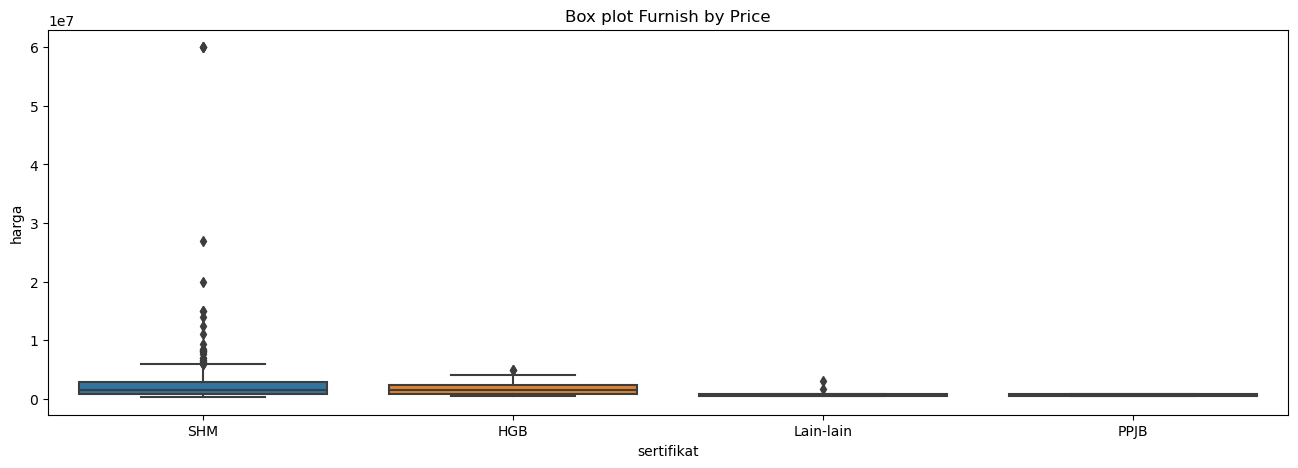

In [26]:
plt.figure(figsize=(16,5))
sns.boxplot(x='sertifikat', y='harga', data=df11)
plt.title('Box plot Furnish by Price')
plt.show()

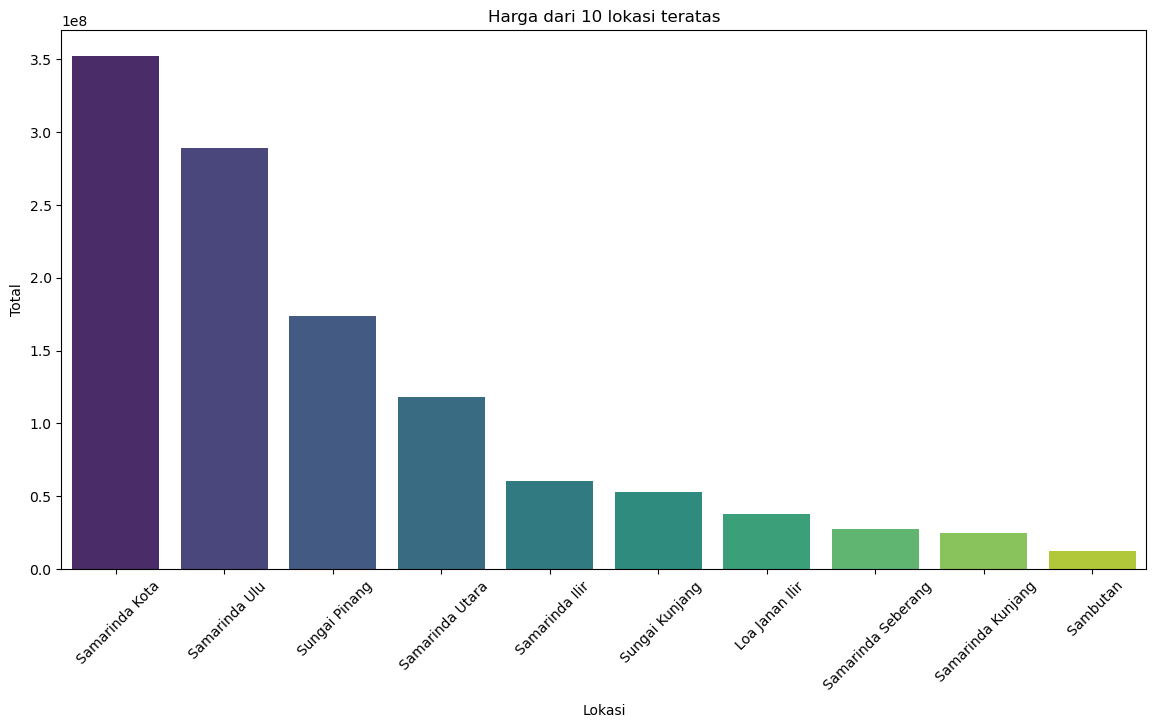

In [27]:
# Mengelompokkan data berdasarkan product_id dan menghitung total penjualan
price_lokasi = df11.groupby('lokasi')['harga'].sum().reset_index()

# Mengurutkan produk berdasarkan total penjualan dan memilih 10 produk teratas
top_10_lokasi = price_lokasi.sort_values(by='harga', ascending=False).head(10)

# Membuat diagram batang untuk total penjualan 10 produk teratas
plt.figure(figsize=(14, 7))
sns.barplot(x='lokasi', y='harga', data=top_10_lokasi, palette='viridis')
plt.title('Harga dari 10 lokasi teratas')
plt.xlabel('Lokasi')
plt.ylabel('Total')
plt.xticks(rotation=45)
plt.show()

In [28]:
df11.furnish.value_counts()

furnish
Non-furnished      390
Semi-furnished      32
Fully-furnished     22
Name: count, dtype: int64

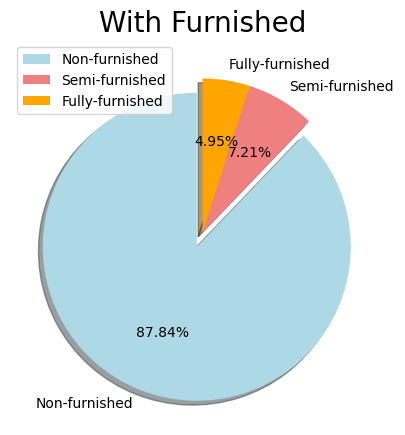

In [29]:
#Melihat presentase Property Group pada data

labels = ['Non-furnished', 'Semi-furnished','Fully-furnished']
size = df11['furnish'].value_counts()
colors = ['lightblue', 'lightcoral', 'orange'][:len(labels)]
explode = [0.1, 0, 0]

fig, axes = plt.subplots(figsize=(6, 5))
plt.pie(size, colors = colors, explode = explode,
        labels = labels, shadow = True, startangle = 90, autopct = '%.2f%%')
plt.title('With Furnished', fontsize = 20)
plt.legend()
plt.show()

#### A.2 Analys Balikpapan_clean

In [30]:
df22.head(5)

,harga,lokasi,luas_bangunan,luas_tanah,sertifikat,furnish,kamar_tidur,kamar_mandi,listrik,kamar_tidur_art,kamar_mandi_art
0,1650000,Balikpapan Selatan,180.0,141.0,SHM,Non-furnished,4,3,2200.0,0,0
1,2100000,Balikpapan Selatan,50.0,776.0,SHM,Non-furnished,3,1,900.0,0,0
2,15000000,Prapatan,2054.0,350.0,SHM,Non-furnished,42,45,33000.0,0,0
3,1950000,Balikpapan Utara,139.7,206.0,SHM,Non-furnished,5,2,2200.0,1,1
4,1180000,Balikpapan Utara,47.0,78.0,SHM,Semi-furnished,2,2,1300.0,0,0


In [31]:
# Melihat statistik deskriptif dari variabel-variabel numerik
df22.describe().T

,count,mean,std,min,25%,50%,75%,max
harga,452.0,2.163519e+06,2.250525e+06,0.0,950000.0,1500000.00,2500000.00,25000000.0
luas_bangunan,452.0,1.778115e+02,1.656084e+02,0.0,91.5,139.85,224.25,2054.0
luas_tanah,452.0,2.357257e+02,2.839142e+02,0.0,120.0,157.00,240.00,4300.0
kamar_tidur,452.0,3.712389e+00,3.079368e+00,0.0,3.0,3.00,4.00,42.0
kamar_mandi,452.0,2.670354e+00,3.070452e+00,0.0,2.0,2.00,3.00,45.0
listrik,452.0,3.094248e+03,3.623869e+03,0.0,1300.0,2200.00,3500.00,53000.0
kamar_tidur_art,452.0,2.057522e-01,5.198180e-01,0.0,0.0,0.00,0.00,5.0
kamar_mandi_art,452.0,1.150442e-01,3.647971e-01,0.0,0.0,0.00,0.00,4.0


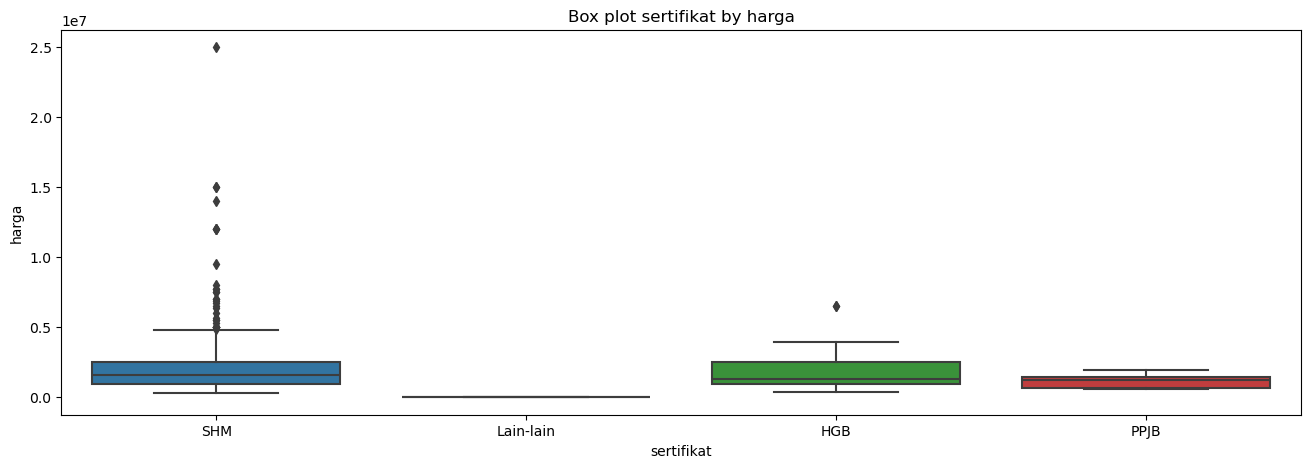

In [32]:
plt.figure(figsize=(16,5))
sns.boxplot(x='sertifikat', y='harga', data=df22)
plt.title('Box plot sertifikat by harga')
plt.show()

In [33]:
df22.sertifikat.value_counts()

sertifikat
SHM          402
HGB           44
PPJB           5
Lain-lain      1
Name: count, dtype: int64

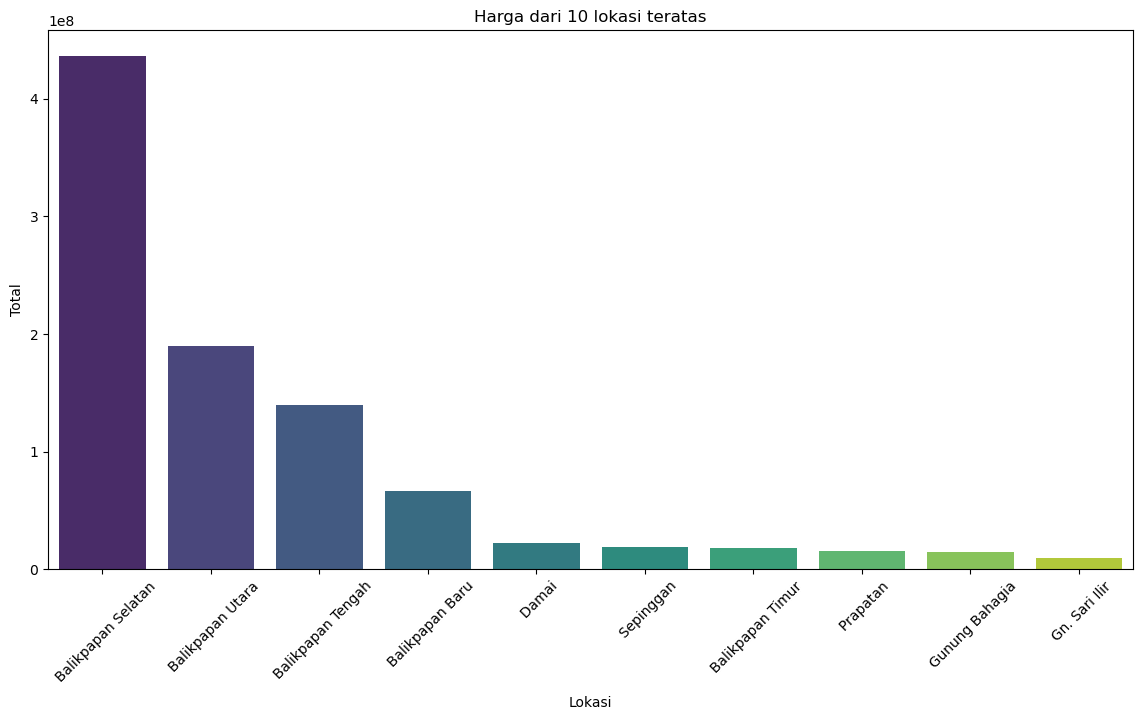

In [34]:
# Mengelompokkan data berdasarkan product_id dan menghitung total penjualan
price_lokasi = df22.groupby('lokasi')['harga'].sum().reset_index()

# Mengurutkan produk berdasarkan total penjualan dan memilih 10 produk teratas
top_10_lokasi = price_lokasi.sort_values(by='harga', ascending=False).head(10)

# Membuat diagram batang untuk total penjualan 10 produk teratas
plt.figure(figsize=(14, 7))
sns.barplot(x='lokasi', y='harga', data=top_10_lokasi, palette='viridis')
plt.title('Harga dari 10 lokasi teratas')
plt.xlabel('Lokasi')
plt.ylabel('Total')
plt.xticks(rotation=45)
plt.show()

In [35]:
df22['sertifikat'].value_counts()

sertifikat
SHM          402
HGB           44
PPJB           5
Lain-lain      1
Name: count, dtype: int64

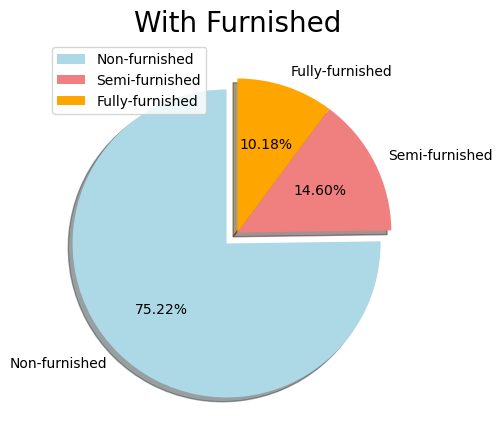

In [36]:
#Melihat presentase Property Group pada data

labels = ['Non-furnished', 'Semi-furnished','Fully-furnished']
size = df22['furnish'].value_counts()
colors = ['lightblue', 'lightcoral', 'orange'][:len(labels)]
explode = [0.1, 0, 0]

fig, axes = plt.subplots(figsize=(6, 5))
plt.pie(size, colors = colors, explode = explode,
        labels = labels, shadow = True, startangle = 90, autopct = '%.2f%%')
plt.title('With Furnished', fontsize = 20)
plt.legend()
plt.show()

# V. Feature Engineering

# VI. Model Definition

# VII. Model Training

# VIII. Model Evaluation

# IX. Model Saving

# X. Model Inference